# Group Project R

Group 3 - Business Analytics Source - Open source

In [1]:
library("haven")
library("tidyr")
library("stringr")
library("dplyr")
library("lubridate")
library("gridExtra")
library("ggplot2")

Warning message:
"package 'haven' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

## I. Opening the Data files:

Reading and viewing all tables created from appendix

In [2]:
country = read.csv('RawData/Countries.csv')
language = read.csv('RawData/Languages.csv')
application = read.csv('RawData/Applications.csv')
product = read.csv('RawData/Products.csv')

In [3]:
head(country, 3)

ï..User_Country,Country
Afghanistan,4
Albania,8
Antarctica,10


In [4]:
head(language, 3)

ï..User_Language,Language
English,1
German,2
Italian,3


In [5]:
head(application, 3)

ï..Website,ApplicationID
BETANDWIN.COM,1
TRIPLE-A-CASINO.COM,2
BETANDWIN.DE,3


Reading and viewing main files - All 3 raw files and Analytic Data file

In [6]:
Internet_Gambling <- read_sas("RawData/AnalyticDataInternetGambling.sas7bdat")

In [7]:
head(Internet_Gambling, 3)

USERID,COUNTRY,LANGUAGE,RegistrationDate,AGE,GENDER,FOTotalStakes,FOTotalWinnings,FOTotalBets,FOFirstActiveDate,FOLastActiveDate,FOTotalDaysActive,LATotalStakes,LATotalWinnings,LATotalBets,LAFirstActiveDate,LALastActiveDate,LATotalDaysActive,FirstSportsActiveDate
1324354,276,2,2005-02-01,42,1,10137.33,10224.12,236,2005-02-24,2005-09-30,97,1839.28,1512.49,43,2005-05-04,2005-09-26,18,2005-02-24
1324355,300,8,2005-02-01,22,1,400.86,453.30,231,2005-02-01,2005-09-29,72,24.70,11.20,21,2005-02-01,2005-02-07,7,2005-02-01
1324356,276,2,2005-02-01,28,1,686.19,285.51,98,2005-02-02,2005-09-12,38,679.07,625.15,116,2005-02-02,2005-09-11,23,2005-02-02


In [8]:
Demographics <- read_sas("RawData/RawDataIDemographics.sas7bdat")

In [9]:
head(Demographics, 3)

UserID,Country,Language,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,ApplicationID,Gender
1324354,276,2,2005-02-01,20050224,20050224,20050224,NULL,NULL,NULL,3,1
1324355,300,8,2005-02-01,20050201,20050201,20050201,NULL,NULL,20050611,1,1
1324356,276,2,2005-02-01,20050201,20050202,20050202,NULL,NULL,NULL,3,1


In [10]:
User_Daily_Agg <- read_sas("RawData/RawDataIIUserDailyAggregation.sas7bdat")

In [11]:
head(User_Daily_Agg, 3)

UserID,Date,ProductID,Stakes,Winnings,Bets
1324354,20050224,1,20,0,2
1324354,20050225,1,0,0,0
1324354,20050227,1,20,0,2


In [12]:
Poker_Chip_Conversion <- read_sas("RawData/RawDataIIIPokerChipConversions.sas7bdat")

In [13]:
head(Poker_Chip_Conversion, 3)

UserID,TransDateTime,TransType,TransAmount
1324355,2005-06-12 00:37:00,124,8.9999
1324355,2005-06-12 00:51:00,124,1.9999
1324355,2005-06-12 01:14:00,124,4.9999


## II. Cleaning the Data:

#### Internet Gambling Table:

In [14]:
head(Internet_Gambling)

USERID,COUNTRY,LANGUAGE,RegistrationDate,AGE,GENDER,FOTotalStakes,FOTotalWinnings,FOTotalBets,FOFirstActiveDate,FOLastActiveDate,FOTotalDaysActive,LATotalStakes,LATotalWinnings,LATotalBets,LAFirstActiveDate,LALastActiveDate,LATotalDaysActive,FirstSportsActiveDate
1324354,276,2,2005-02-01,42,1,10137.3300,10224.1200,236,2005-02-24,2005-09-30,97,1839.2800,1512.4900,43,2005-05-04,2005-09-26,18,2005-02-24
1324355,300,8,2005-02-01,22,1,400.8600,453.3000,231,2005-02-01,2005-09-29,72,24.7000,11.2000,21,2005-02-01,2005-02-07,7,2005-02-01
1324356,276,2,2005-02-01,28,1,686.1900,285.5100,98,2005-02-02,2005-09-12,38,679.0700,625.1500,116,2005-02-02,2005-09-11,23,2005-02-02
1324358,752,1,2005-02-01,24,1,247.6971,153.8756,7,2005-02-01,2005-05-06,5,88.5927,55.9819,4,2005-05-03,2005-05-03,1,2005-02-01
1324360,792,7,2005-02-01,27,1,59.9993,39.9564,40,2005-02-02,2005-09-25,17,1.7434,1.2009,3,2005-02-12,2005-09-21,2,2005-02-02
1324362,276,2,2005-02-01,22,1,22.0000,0.0000,7,2005-02-11,2005-09-17,5,NA,NA,NA,NA,NA,NA,2005-02-11


In [15]:
#Looking where the missing values are:
sapply(Internet_Gambling,function(x) sum(is.na(x)))

USERID               COUNTRY              LANGUAGE 
                    0                     0                     0 
     RegistrationDate                   AGE                GENDER 
                    0                     0                     1 
        FOTotalStakes       FOTotalWinnings           FOTotalBets 
                  780                   780                   780 
    FOFirstActiveDate      FOLastActiveDate     FOTotalDaysActive 
                  780                   780                   780 
        LATotalStakes       LATotalWinnings           LATotalBets 
                15705                 15705                 15705 
    LAFirstActiveDate      LALastActiveDate     LATotalDaysActive 
                15705                 15705                 15706 
FirstSportsActiveDate 
                    0

In [16]:
Internet_Gambling %>%
count()

n
40499


In [17]:
#creating age groups:
Internet_Gambling$Age_Group <- cut(Internet_Gambling$AGE, breaks=c(10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110), right = FALSE, labels = FALSE)

In [18]:
head(Internet_Gambling)

USERID,COUNTRY,LANGUAGE,RegistrationDate,AGE,GENDER,FOTotalStakes,FOTotalWinnings,FOTotalBets,FOFirstActiveDate,FOLastActiveDate,FOTotalDaysActive,LATotalStakes,LATotalWinnings,LATotalBets,LAFirstActiveDate,LALastActiveDate,LATotalDaysActive,FirstSportsActiveDate,Age_Group
1324354,276,2,2005-02-01,42,1,10137.3300,10224.1200,236,2005-02-24,2005-09-30,97,1839.2800,1512.4900,43,2005-05-04,2005-09-26,18,2005-02-24,4
1324355,300,8,2005-02-01,22,1,400.8600,453.3000,231,2005-02-01,2005-09-29,72,24.7000,11.2000,21,2005-02-01,2005-02-07,7,2005-02-01,2
1324356,276,2,2005-02-01,28,1,686.1900,285.5100,98,2005-02-02,2005-09-12,38,679.0700,625.1500,116,2005-02-02,2005-09-11,23,2005-02-02,2
1324358,752,1,2005-02-01,24,1,247.6971,153.8756,7,2005-02-01,2005-05-06,5,88.5927,55.9819,4,2005-05-03,2005-05-03,1,2005-02-01,2
1324360,792,7,2005-02-01,27,1,59.9993,39.9564,40,2005-02-02,2005-09-25,17,1.7434,1.2009,3,2005-02-12,2005-09-21,2,2005-02-02,2
1324362,276,2,2005-02-01,22,1,22.0000,0.0000,7,2005-02-11,2005-09-17,5,NA,NA,NA,NA,NA,NA,2005-02-11,2


In [19]:
#Looking where the missing values are:
sapply(Internet_Gambling,function(x) sum(is.na(x)))

USERID               COUNTRY              LANGUAGE 
                    0                     0                     0 
     RegistrationDate                   AGE                GENDER 
                    0                     0                     1 
        FOTotalStakes       FOTotalWinnings           FOTotalBets 
                  780                   780                   780 
    FOFirstActiveDate      FOLastActiveDate     FOTotalDaysActive 
                  780                   780                   780 
        LATotalStakes       LATotalWinnings           LATotalBets 
                15705                 15705                 15705 
    LAFirstActiveDate      LALastActiveDate     LATotalDaysActive 
                15705                 15705                 15706 
FirstSportsActiveDate             Age_Group 
                    0                     0

#### Demographic Table:

In [20]:
head(Demographics)

UserID,Country,Language,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,ApplicationID,Gender
1324354,276,2,2005-02-01,20050224,20050224,20050224,NULL,NULL,NULL,3,1
1324355,300,8,2005-02-01,20050201,20050201,20050201,NULL,NULL,20050611,1,1
1324356,276,2,2005-02-01,20050201,20050202,20050202,NULL,NULL,NULL,3,1
1324358,752,1,2005-02-01,20050201,20050201,20050201,NULL,NULL,NULL,1,1
1324360,792,7,2005-02-01,20050202,20050202,20050202,20050203,NULL,NULL,9,1
1324362,276,2,2005-02-01,20050211,20050211,20050211,NULL,NULL,NULL,3,1


Formating Dates:

In [21]:
#Here we need to covert firstpay, firstact,firstsp, FirstCa, FirstGa, FirstPo into date fromats
Demographics$FirstPay= ymd(Demographics$FirstPay)
Demographics$FirstAct= ymd(Demographics$FirstAct)
Demographics$FirstSp= ymd(Demographics$FirstSp)
Demographics$FirstCa= ymd(Demographics$FirstCa)
Demographics$FirstGa= ymd(Demographics$FirstGa)
Demographics$FirstPo= ymd(Demographics$FirstPo)

Warning message:
" 1236 failed to parse."Warning message:
" 36761 failed to parse."Warning message:
" 39376 failed to parse."Warning message:
" 40507 failed to parse."

In [22]:
head(Demographics)

UserID,Country,Language,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,ApplicationID,Gender
1324354,276,2,2005-02-01,2005-02-24,2005-02-24,2005-02-24,NA,NA,NA,3,1
1324355,300,8,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,2005-06-11,1,1
1324356,276,2,2005-02-01,2005-02-01,2005-02-02,2005-02-02,NA,NA,NA,3,1
1324358,752,1,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,NA,1,1
1324360,792,7,2005-02-01,2005-02-02,2005-02-02,2005-02-02,2005-02-03,NA,NA,9,1
1324362,276,2,2005-02-01,2005-02-11,2005-02-11,2005-02-11,NA,NA,NA,3,1


Dealing with missing values

In [23]:
#Looking where the missing values are:
sapply(Demographics,function(x) sum(is.na(x)))
# need to change missing value gender
       
# For the rest we decide not to replace the values as here missing values are only in dates of FirstSp, FirstCa, FirstGa and FirstPomean.
# The null values here mean that the user never played that game so obviously there is no date.

UserID       Country      Language       RegDate      FirstPay 
            0             0             0             0             0 
     FirstAct       FirstSp       FirstCa       FirstGa       FirstPo 
            2          1236         36761         39376         40507 
ApplicationID        Gender 
            0             1

In [24]:
# Looking for which country the missing value is:
Demographics[is.na(Demographics$Gender),]

UserID,Country,Language,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,ApplicationID,Gender
1393233,724,4,2005-02-25,2005-03-14,2005-03-14,2005-03-14,NA,NA,NA,1,NA


In [25]:
# Looking if there are more males or females in country 724:
Demographics %>% 
 filter(Country == 724) %>%
 summary (Gender = mean(Gender))

     UserID           Country       Language        RegDate         
 Min.   :1324405   Min.   :724   Min.   : 1.000   Length:2407       
 1st Qu.:1341778   1st Qu.:724   1st Qu.: 4.000   Class :character  
 Median :1364481   Median :724   Median : 4.000   Mode  :character  
 Mean   :1363429   Mean   :724   Mean   : 4.598                     
 3rd Qu.:1384511   3rd Qu.:724   3rd Qu.: 4.000                     
 Max.   :1402191   Max.   :724   Max.   :12.000                     
                                                                    
    FirstPay             FirstAct             FirstSp          
 Min.   :2005-02-01   Min.   :2005-02-01   Min.   :2005-02-01  
 1st Qu.:2005-02-11   1st Qu.:2005-02-11   1st Qu.:2005-02-11  
 Median :2005-02-20   Median :2005-02-21   Median :2005-02-21  
 Mean   :2005-03-02   Mean   :2005-03-02   Mean   :2005-03-02  
 3rd Qu.:2005-02-26   3rd Qu.:2005-02-26   3rd Qu.:2005-02-26  
 Max.   :2005-10-02   Max.   :2005-10-02   Max.   :2005-10-02  


In [26]:
# As mean of Gender for Country 724 is 0.95 there are more Males so we will replace the missing value by a male
Demographics[is.na(Demographics$Gender),"Gender"] <- 1

In [27]:
# Assigning the demographics dataframe to a new dataframe, keeping the original intact
Demographics_new <- Demographics

Replacing Language, Country and Website numbers by their names:

In [28]:
# Replacing numbers by translated text from appendix tables by joining them with the demographics table
Demographics_new <- left_join(Demographics_new, language, by = "Language")

In [29]:
Demographics_new <- left_join(Demographics_new, country, by = "Country")

In [30]:
Demographics_new <- left_join(Demographics_new, application, by = "ApplicationID")

In [31]:
# Dropping the columns with number codes that are not required anymore
Demographics_new <- select(Demographics_new,-c("Language","Country","ApplicationID"))

In [32]:
# Converting integer values of gender to characters 
Demographics_new$Gender[Demographics_new$Gender  == 0]  <-  "Female"
Demographics_new$Gender[Demographics_new$Gender  == 1]  <-  "Male"
head(Demographics_new)

UserID,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,Gender,ï..User_Language,ï..User_Country,ï..Website
1324354,2005-02-01,2005-02-24,2005-02-24,2005-02-24,NA,NA,NA,Male,German,Germany,BETANDWIN.DE
1324355,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,2005-06-11,Male,Greek,Greece,BETANDWIN.COM
1324356,2005-02-01,2005-02-01,2005-02-02,2005-02-02,NA,NA,NA,Male,German,Germany,BETANDWIN.DE
1324358,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,NA,Male,English,Sweden,BETANDWIN.COM
1324360,2005-02-01,2005-02-02,2005-02-02,2005-02-02,2005-02-03,NA,NA,Male,Turkish,Turkey,BETEUROPE.COM
1324362,2005-02-01,2005-02-11,2005-02-11,2005-02-11,NA,NA,NA,Male,German,Germany,BETANDWIN.DE


In [33]:
# Renaming columns:
Demographics_new <- Demographics_new %>% rename(Country = ï..User_Country, Language = ï..User_Language, Website = ï..Website)

In [34]:
head(Demographics_new)

UserID,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,Gender,Language,Country,Website
1324354,2005-02-01,2005-02-24,2005-02-24,2005-02-24,NA,NA,NA,Male,German,Germany,BETANDWIN.DE
1324355,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,2005-06-11,Male,Greek,Greece,BETANDWIN.COM
1324356,2005-02-01,2005-02-01,2005-02-02,2005-02-02,NA,NA,NA,Male,German,Germany,BETANDWIN.DE
1324358,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,NA,Male,English,Sweden,BETANDWIN.COM
1324360,2005-02-01,2005-02-02,2005-02-02,2005-02-02,2005-02-03,NA,NA,Male,Turkish,Turkey,BETEUROPE.COM
1324362,2005-02-01,2005-02-11,2005-02-11,2005-02-11,NA,NA,NA,Male,German,Germany,BETANDWIN.DE


#### User Daily Aggregation Table:

Formating Dates

In [35]:
#Converting Date into date fromats:
User_Daily_Agg$Date= ymd(User_Daily_Agg$Date)

In [36]:
head(User_Daily_Agg)

UserID,Date,ProductID,Stakes,Winnings,Bets
1324354,2005-02-24,1,20,0,2
1324354,2005-02-25,1,0,0,0
1324354,2005-02-27,1,20,0,2
1324354,2005-03-03,1,10,0,1
1324354,2005-03-04,1,10,0,1
1324354,2005-03-05,1,10,0,1


Looking for missing values:

In [37]:
# Making sure there are no missing values:
sum(is.na(User_Daily_Agg))

[1] 0

Creating new variables

In [38]:
# Making a new dataframe with number of transactions per UserID in the given period
User_Daily_Agg1 <- User_Daily_Agg %>% group_by(UserID) %>% summarise(Last_Trans_Date=max(Date), Nbr_of_Trans=n(), Total_Stakes=round(sum(Stakes)), Total_Winning=round(sum(Winnings)), Total_Bets=round(sum(Bets)), 
                                                                     Avg_Stakes=round(mean(Stakes)), Avg_Winning=round(mean(Winnings)), Avg_Bets=round(mean(Bets)),
                                                                     Prod1_SportsBook_FixedOdd=length(ProductID[ProductID == 1]), Prod2_SportsBook_LiveAct=length(ProductID[ProductID == 2]),Prod3_Poker_BossMedia=length(ProductID[ProductID == 3]),
                                                                    Prod4_Casino_BossMedia=length(ProductID[ProductID == 4]),Prod5_Supertoto=length(ProductID[ProductID == 5]),Prod6_Games_VS=length(ProductID[ProductID == 6]),
                                                                    Prod7_Games_bwin=length(ProductID[ProductID == 7]),Prod8_Casino_Chartwell=length(ProductID[ProductID == 8]))
head(User_Daily_Agg1)

`summarise()` ungrouping output (override with `.groups` argument)


UserID,Last_Trans_Date,Nbr_of_Trans,Total_Stakes,Total_Winning,Total_Bets,Avg_Stakes,Avg_Winning,Avg_Bets,Prod1_SportsBook_FixedOdd,Prod2_SportsBook_LiveAct,Prod3_Poker_BossMedia,Prod4_Casino_BossMedia,Prod5_Supertoto,Prod6_Games_VS,Prod7_Games_bwin,Prod8_Casino_Chartwell
1324354,2005-09-30,136,11977,11737,279,88,86,2,117,19,0,0,0,0,0,0
1324355,2005-09-29,106,426,464,252,4,4,2,99,7,0,0,0,0,0,0
1324356,2005-09-12,75,1365,911,214,18,12,3,51,24,0,0,0,0,0,0
1324358,2005-05-06,9,336,210,11,37,23,1,8,1,0,0,0,0,0,0
1324360,2005-09-25,32,66,43,47,2,1,1,29,2,0,0,0,0,0,1
1324362,2005-09-17,7,22,0,7,3,0,1,7,0,0,0,0,0,0,0


In [39]:
head(Poker_Chip_Conversion)

UserID,TransDateTime,TransType,TransAmount
1324355,2005-06-12 00:37:00,124,8.9999
1324355,2005-06-12 00:51:00,124,1.9999
1324355,2005-06-12 01:14:00,124,4.9999
1324355,2005-06-12 02:01:00,24,1.8069
1324355,2005-06-14 23:35:00,124,4.9999
1324355,2005-06-14 23:45:00,124,4.9999


Extracting date from TransDate Time collumn

In [40]:
# Extracting only transaction date from TransDateTime columns:
Poker_Chip_Conversion$TransDate <- as.Date(Poker_Chip_Conversion$TransDateTime,"%Y-%m-%d")
head(Poker_Chip_Conversion)

UserID,TransDateTime,TransType,TransAmount,TransDate
1324355,2005-06-12 00:37:00,124,8.9999,2005-06-12
1324355,2005-06-12 00:51:00,124,1.9999,2005-06-12
1324355,2005-06-12 01:14:00,124,4.9999,2005-06-12
1324355,2005-06-12 02:01:00,24,1.8069,2005-06-12
1324355,2005-06-14 23:35:00,124,4.9999,2005-06-14
1324355,2005-06-14 23:45:00,124,4.9999,2005-06-14


Grouping Data 

In [41]:
# Grouping the data by UserID and transaction type to count total number of buy and sell transactions and amount for each
Poker_Chip_Conversion1 <- Poker_Chip_Conversion %>% group_by(UserID, TransType) %>% summarise(Nbr_of_Conversions=n(), Total_TransAmount=round(sum(TransAmount)))
head(Poker_Chip_Conversion1)

`summarise()` regrouping output by 'UserID' (override with `.groups` argument)


UserID,TransType,Nbr_of_Conversions,Total_TransAmount
1324355,24,2,8
1324355,124,6,31
1324368,24,32,9621
1324368,124,67,9162
1324369,24,1,0
1324369,124,1,0


Making data wider

In [42]:
# Making the dataframe wider to get a single entry for each UserID
Poker_Chip_Conversion2 <- pivot_wider(Poker_Chip_Conversion1, id_cols=UserID, names_from=TransType, values_from=c("Nbr_of_Conversions","Total_TransAmount"))

Finalising the new table

In [43]:
# Renaming the variables for more clarity
Poker_Chip_Conversion2 <- Poker_Chip_Conversion2 %>% rename(Nbr_PokerChip_Buy_Trans = Nbr_of_Conversions_24, Nbr_PokerChip_Sell_Trans = Nbr_of_Conversions_124, PokerChip_BuyTransAmt = Total_TransAmount_24, PokerChip_SellTransAmt = Total_TransAmount_124)

In [44]:
# Rearranging the columns 
Poker_Chip_Conversion2 <- Poker_Chip_Conversion2 %>% select(1, 2, 4, 3, 5)  
head(Poker_Chip_Conversion2)

# Alternative:
# Poker_Chip_Conversion2 %>% relocate(Nbr_PokerChip_Sell_Trans, .after = PokerChip_BuyTransAmt)

UserID,Nbr_PokerChip_Buy_Trans,PokerChip_BuyTransAmt,Nbr_PokerChip_Sell_Trans,PokerChip_SellTransAmt
1324355,2,8,6,31
1324368,32,9621,67,9162
1324369,1,0,1,0
1324371,5,65,5,123
1324372,116,918,122,861
1324377,2,13,5,28


In [45]:
# Making sure there are no missing values:
sum(is.na(Poker_Chip_Conversion))

[1] 0

## III. Creating the Datamart:

With left joins:

In [46]:
# Merging Demograpics and User Daily Aggregate 1 tables (Raw Datasets I & II)
Merge1 <- left_join(Demographics_new, User_Daily_Agg1, by = "UserID")
head(Merge1)

UserID,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,Gender,Language,...,Avg_Winning,Avg_Bets,Prod1_SportsBook_FixedOdd,Prod2_SportsBook_LiveAct,Prod3_Poker_BossMedia,Prod4_Casino_BossMedia,Prod5_Supertoto,Prod6_Games_VS,Prod7_Games_bwin,Prod8_Casino_Chartwell
1324354,2005-02-01,2005-02-24,2005-02-24,2005-02-24,NA,NA,NA,Male,German,...,86,2,117,19,0,0,0,0,0,0
1324355,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,2005-06-11,Male,Greek,...,4,2,99,7,0,0,0,0,0,0
1324356,2005-02-01,2005-02-01,2005-02-02,2005-02-02,NA,NA,NA,Male,German,...,12,3,51,24,0,0,0,0,0,0
1324358,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,NA,Male,English,...,23,1,8,1,0,0,0,0,0,0
1324360,2005-02-01,2005-02-02,2005-02-02,2005-02-02,2005-02-03,NA,NA,Male,Turkish,...,1,1,29,2,0,0,0,0,0,1
1324362,2005-02-01,2005-02-11,2005-02-11,2005-02-11,NA,NA,NA,Male,German,...,0,1,7,0,0,0,0,0,0,0


In [47]:
# Merge 2: A concatenated database for every registered user from February 1, 2005 through September 30, 2005
# Created from Raw Dataset I, II and III
Merge2 <- left_join(Merge1, Poker_Chip_Conversion2, by = "UserID")
head(Merge2)

UserID,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,Gender,Language,...,Prod3_Poker_BossMedia,Prod4_Casino_BossMedia,Prod5_Supertoto,Prod6_Games_VS,Prod7_Games_bwin,Prod8_Casino_Chartwell,Nbr_PokerChip_Buy_Trans,PokerChip_BuyTransAmt,Nbr_PokerChip_Sell_Trans,PokerChip_SellTransAmt
1324354,2005-02-01,2005-02-24,2005-02-24,2005-02-24,NA,NA,NA,Male,German,...,0,0,0,0,0,0,NA,NA,NA,NA
1324355,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,2005-06-11,Male,Greek,...,0,0,0,0,0,0,2,8,6,31
1324356,2005-02-01,2005-02-01,2005-02-02,2005-02-02,NA,NA,NA,Male,German,...,0,0,0,0,0,0,NA,NA,NA,NA
1324358,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,NA,Male,English,...,0,0,0,0,0,0,NA,NA,NA,NA
1324360,2005-02-01,2005-02-02,2005-02-02,2005-02-02,2005-02-03,NA,NA,Male,Turkish,...,0,0,0,0,0,1,NA,NA,NA,NA
1324362,2005-02-01,2005-02-11,2005-02-11,2005-02-11,NA,NA,NA,Male,German,...,0,0,0,0,0,0,NA,NA,NA,NA


In [48]:
# Final Merge: A comprehensive database of all registered users from February 1, 2005 through September 30, 2005 
# Combining data from all three Raw Datasets and the Analytic Dataset

Datamart <- left_join(Merge2, Internet_Gambling, by = c("UserID" = "USERID"))

In [49]:
# Removing duplicate columns
Datamart <- select (Datamart,-c(COUNTRY, GENDER, LANGUAGE, RegistrationDate, FirstSportsActiveDate))

In [50]:
# Reordering the datamart
Datamart %>% dplyr::relocate(Gender,AGE,Language,Country,Website, .after = UserID)

UserID,Gender,AGE,Language,Country,Website,RegDate,FirstPay,FirstAct,FirstSp,...,FOFirstActiveDate,FOLastActiveDate,FOTotalDaysActive,LATotalStakes,LATotalWinnings,LATotalBets,LAFirstActiveDate,LALastActiveDate,LATotalDaysActive,Age_Group
1324354,Male,42,German,Germany,BETANDWIN.DE,2005-02-01,2005-02-24,2005-02-24,2005-02-24,...,2005-02-24,2005-09-30,97,1839.2800,1512.4900,43,2005-05-04,2005-09-26,18,4
1324355,Male,22,Greek,Greece,BETANDWIN.COM,2005-02-01,2005-02-01,2005-02-01,2005-02-01,...,2005-02-01,2005-09-29,72,24.7000,11.2000,21,2005-02-01,2005-02-07,7,2
1324356,Male,28,German,Germany,BETANDWIN.DE,2005-02-01,2005-02-01,2005-02-02,2005-02-02,...,2005-02-02,2005-09-12,38,679.0700,625.1500,116,2005-02-02,2005-09-11,23,2
1324358,Male,24,English,Sweden,BETANDWIN.COM,2005-02-01,2005-02-01,2005-02-01,2005-02-01,...,2005-02-01,2005-05-06,5,88.5927,55.9819,4,2005-05-03,2005-05-03,1,2
1324360,Male,27,Turkish,Turkey,BETEUROPE.COM,2005-02-01,2005-02-02,2005-02-02,2005-02-02,...,2005-02-02,2005-09-25,17,1.7434,1.2009,3,2005-02-12,2005-09-21,2,2
1324362,Male,22,German,Germany,BETANDWIN.DE,2005-02-01,2005-02-11,2005-02-11,2005-02-11,...,2005-02-11,2005-09-17,5,NA,NA,NA,NA,NA,NA,2
1324363,Male,22,Danish,Denmark,BETANDWIN.COM,2005-02-01,2005-02-01,2005-02-01,2005-02-01,...,2005-02-01,2005-02-22,3,NA,NA,NA,NA,NA,NA,2
1324364,Male,37,German,Germany,BETANDWIN.DE,2005-02-01,2005-02-03,2005-02-03,2005-02-03,...,2005-02-04,2005-09-11,8,210.0000,40.1500,37,2005-02-03,2005-09-28,12,3
1324368,Male,22,Portuguese,Portugal,BETANDWIN.COM,2005-02-01,2005-03-18,2005-03-18,2005-03-18,...,2005-03-18,2005-08-28,56,6086.2800,6074.8400,328,2005-03-31,2005-08-21,60,2
1324369,Male,20,Turkish,Turkey,BETEUROPE.COM,2005-02-01,2005-02-01,2005-02-01,2005-02-01,...,2005-02-01,2005-05-06,32,147.3645,119.3069,112,2005-02-01,2005-05-04,35,2


In [51]:
#str(Datamart)

In [52]:
# Exporting the data into a csv file
write.csv(Datamart,"created_data/final_datamart.csv", row.names = FALSE)

In [53]:
Datamart %>%
count

n
42649


In [54]:
sapply(Datamart,function(x) sum(is.na(x)))

UserID                   RegDate                  FirstPay 
                        0                         0                         0 
                 FirstAct                   FirstSp                   FirstCa 
                        2                      1236                     36761 
                  FirstGa                   FirstPo                    Gender 
                    39376                     40507                         0 
                 Language                   Country                   Website 
                        0                         0                         0 
          Last_Trans_Date              Nbr_of_Trans              Total_Stakes 
                      444                       444                       444 
            Total_Winning                Total_Bets                Avg_Stakes 
                      444                       444                       444 
              Avg_Winning                  Avg_Bets Prod1_SportsBook_FixedOdd 
                      444                       444                       444 
 Prod2_SportsBook_LiveAct     Prod3_Poker_BossMedia    Prod4_Casino_BossMedia 
                      444                       444                       444 
          Prod5_Supertoto            Prod6_Games_VS          Prod7_Games_bwin 
                      444                       444                       444 
   Prod8_Casino_Chartwell   Nbr_PokerChip_Buy_Trans     PokerChip_BuyTransAmt 
                      444                     40296                     40296 
 Nbr_PokerChip_Sell_Trans    PokerChip_SellTransAmt                       AGE 
                    40264                     40264                      2150 
            FOTotalStakes           FOTotalWinnings               FOTotalBets 
                     2930                      2930                      2930 
        FOFirstActiveDate          FOLastActiveDate         FOTotalDaysActive 
                     2930                      2930                      2930 
            LATotalStakes           LATotalWinnings               LATotalBets 
                    17855                     17855                     17855 
        LAFirstActiveDate          LALastActiveDate         LATotalDaysActive 
                    17855                     17855                     17856 
                Age_Group 
                     2150

## III. Data Analysis for Customer Descriptive:

####  This section is a base for our graphs in the shiny app. It also has some insights not included in the final app as it wasn't important

### Gender

In [55]:
#Create groupby of gender
Gender <- Datamart %>%
  group_by(Gender) %>% 
  summarize(NbrUsers = n()) %>%
  transmute(Gender,NbrUsers, Percentage=NbrUsers*100/sum(NbrUsers))

Gender

`summarise()` ungrouping output (override with `.groups` argument)


Gender,NbrUsers,Percentage
Female,3588,8.412858
Male,39061,91.587142


In [56]:
# Selecting top 10 countries with maximum users

MaxUsers <- Datamart %>%
  group_by(Country) %>% 
  summarize(NbrUsers = n()) %>%
  mutate(Percent=NbrUsers*100/sum(NbrUsers)) %>%
  top_n(10, wt=NbrUsers) %>%
  arrange(desc(NbrUsers))

MaxUsers

`summarise()` ungrouping output (override with `.groups` argument)


Country,NbrUsers,Percent
Germany,24171,56.674248
Turkey,2477,5.807874
Poland,2417,5.667190
Spain,2407,5.643743
Greece,2392,5.608572
France,2087,4.893432
Denmark,1825,4.279116
Austria,1459,3.420948
Italy,1006,2.358789
Switzerland,577,1.352904


In [57]:
#Exporting MaxUsers 
write.csv(MaxUsers,"created_data/max_users.csv", row.names = FALSE)

In [58]:
# How much of each gender per country:

#Create groupby of gender per country
GenderCountry <- Datamart %>%
  group_by(Country,Gender) %>%
  summarize(NbrUsers = n())

`summarise()` regrouping output by 'Country' (override with `.groups` argument)


In [59]:
# Filtering the users per gender per country for top 10 countries with max users
GenderCountry_top10 <- dplyr::filter(GenderCountry, grepl('Germany|Turkey|Poland|Spain|Greece|France|Denmark|Austria|Italy|Switzerland', Country))

In [60]:
#Exporting Gender by country table
write.csv(GenderCountry_top10,"created_data/gender_country.csv", row.names = FALSE)

##### Specific Preferences of Females:

In [61]:
#Create a subset of females
Female <- subset(Datamart, Gender == "Female")
head(Female)

UserID,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,Gender,Language,...,FOFirstActiveDate,FOLastActiveDate,FOTotalDaysActive,LATotalStakes,LATotalWinnings,LATotalBets,LAFirstActiveDate,LALastActiveDate,LATotalDaysActive,Age_Group
1324402,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,NA,Female,German,...,2005-02-01,2005-02-12,5,NA,NA,NA,NA,NA,NA,2
1324411,2005-02-01,2005-02-04,2005-02-16,2005-02-16,NA,NA,NA,Female,German,...,2005-02-16,2005-02-18,2,NA,NA,NA,NA,NA,NA,4
1324427,2005-02-01,2005-02-08,2005-02-08,2005-02-08,NA,NA,NA,Female,Greek,...,2005-02-08,2005-03-11,12,NA,NA,NA,NA,NA,NA,4
1324441,2005-02-01,2005-03-09,2005-03-11,2005-03-11,NA,NA,NA,Female,German,...,2005-03-11,2005-04-09,5,NA,NA,NA,NA,NA,NA,2
1324448,2005-02-01,2005-02-02,2005-02-02,2005-02-02,NA,NA,NA,Female,English,...,2005-02-02,2005-02-03,1,NA,NA,NA,NA,NA,NA,3
1324491,2005-02-01,2005-02-03,2005-02-03,2005-02-03,NA,NA,NA,Female,German,...,2005-02-03,2005-04-09,31,NA,NA,NA,NA,NA,NA,3


In [62]:
#How many female users are there?
Female %>%
count()

n
3588


Warning message:
"Removed 198 rows containing non-finite values (stat_bin)."

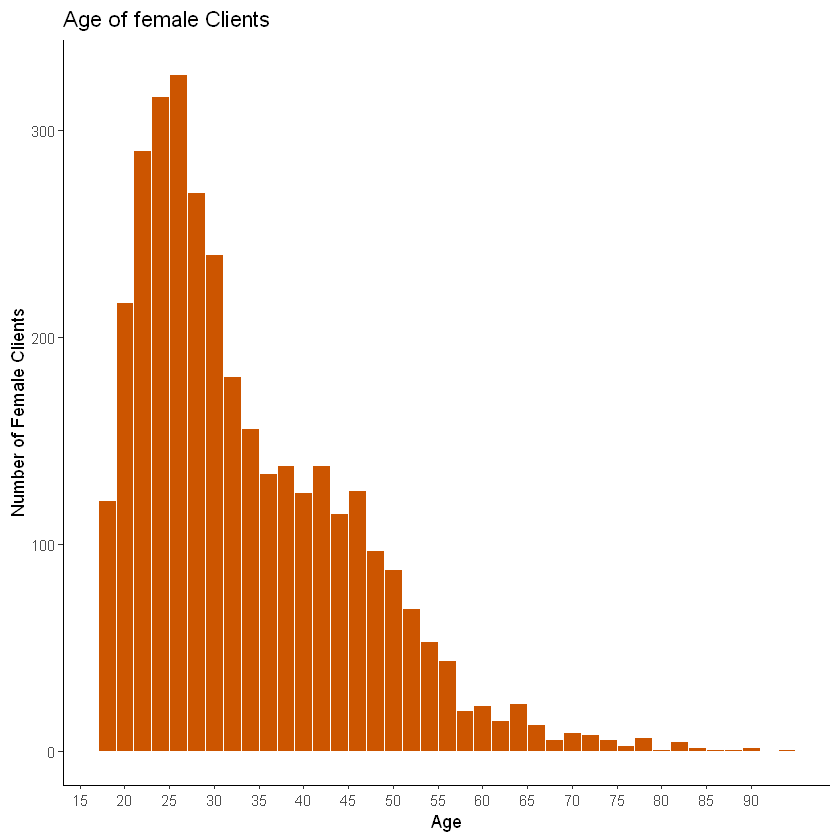

In [63]:
# Age of Female users:
ggplot(Female, aes(x = AGE)) + 
theme_bw() + 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.border = element_blank(),  # remove borders
axis.line = element_line()) + 
scale_x_continuous(breaks=seq(0,90,5)) +
  geom_histogram(fill = "#CC5500",bins=30, binwidth=2,color="white") +
  labs(title = "Age of female Clients", x = "Age", y = "Number of Female Clients")
options(repr.plot.width=3, repr.plot.height=2)

#Looks simialr to overall age just in smaller amounts 

In [64]:
# Which product is used more by females:
Total_Prod1_F = sum(Female$Prod1_SportsBook_FixedOdd, na.rm = TRUE)
Total_Prod2_F = sum(Female$Prod2_SportsBook_LiveAct, na.rm = TRUE)
Total_Prod3_F = sum(Female$Prod3_Poker_BossMedia, na.rm = TRUE)
Total_Prod4_F = sum(Female$Prod4_Casino_BossMedia, na.rm = TRUE)
Total_Prod5_F = sum(Female$Prod5_Supertoto, na.rm = TRUE)
Total_Prod6_F = sum(Female$Prod6_Games_VS, na.rm = TRUE)
Total_Prod7_F = sum(Female$Prod7_Games_bwin, na.rm = TRUE)
Total_Prod8_F = sum(Female$Prod8_Casino_Chartwell, na.rm = TRUE)

Product = c("Prod1_SportsBook_FixedOdd","Prod2_SportsBook_LiveAct","Prod3_Poker_BossMedia","Prod4_Casino_BossMedia","Prod5_Supertoto","Prod6_Games_VS","Prod7_Games_bwin","Prod8_Casino_Chartwell")
Total_Sales = c(Total_Prod1_F,Total_Prod2_F,Total_Prod3_F,Total_Prod4_F,Total_Prod5_F,Total_Prod6_F,Total_Prod7_F,Total_Prod8_F)

product_sale_Female = data.frame(Product,Total_Sales)
product_sale_Female <- product_sale_Female %>% transmute(Product, Total_Sales, Percent = Total_Sales*100/sum(Total_Sales))
product_sale_Female

Product,Total_Sales,Percent
Prod1_SportsBook_FixedOdd,82973,72.8421182
Prod2_SportsBook_LiveAct,24172,21.2206342
Prod3_Poker_BossMedia,0,0.0000000
Prod4_Casino_BossMedia,1720,1.5099905
Prod5_Supertoto,363,0.3186782
Prod6_Games_VS,1196,1.0499702
Prod7_Games_bwin,755,0.6628156
Prod8_Casino_Chartwell,2729,2.3957931


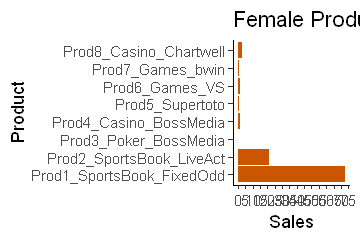

In [65]:
ggplot(product_sale_Female, aes(x = Product, y = Percent)) +  
theme_bw() + 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.border = element_blank(),  # remove borders
axis.line = element_line()) + 
scale_y_continuous(breaks=seq(0,80,5)) +
geom_bar(stat = "identity", fill = "#CC5500", position = "dodge") + 
labs(title = "Female Product Sales", x = "Product", y = "Sales") +
coord_flip() 
options(repr.plot.width=6, repr.plot.height=4)

### Location of Users

In [66]:
#Create groupby of clients per region
UserRegion <- Datamart %>%
 count(Country) %>%
 rename(region = Country, NbrUsers=n)
head(UserRegion)

region,NbrUsers
Albania,2
Andorra,7
Argentina,2
Australia,31
Austria,1459
Belarus,2


 ### Source:

In [67]:
# Counting users for each website/application
PreferredRoute <- Datamart %>% group_by(Website) %>% summarize(Number_of_Users = n())

`summarise()` ungrouping output (override with `.groups` argument)


In [68]:
# Selecting websites through which more than 20 users were acquired
    PreferredRoute1 <- Datamart %>% group_by(Website) %>% summarize(Number_of_Users = n()) %>% filter(Number_of_Users > 20)

`summarise()` ungrouping output (override with `.groups` argument)


In [69]:
 # Grouping together websites through which less than 20 users were acquired
    PreferredRoute2 <- PreferredRoute %>% filter(Number_of_Users <= 20) %>% 
      summarize (Website = "OTHER WEBSITES", Number_of_Users = sum(Number_of_Users))

In [70]:
 # stacking both tables togther and sorting them in descending order
    AcquisitionSources <- rbind(PreferredRoute1, PreferredRoute2)
    AcquisitionSources <- AcquisitionSources[order(-AcquisitionSources$Number_of_Users),]

In [71]:
# Exporting the data into a csv file
write.csv(AcquisitionSources ,"created_data/acquisition_sources.csv", row.names = FALSE)

### Registrations & Subscriptions:

In [72]:
#- Comparison graph of number of customers who registered VS number of customers who paid in the same month (per month-year)
#- Which country + age-group has max pay ratio (dropdown of countries Top 12 and others)
#- Average, min and max time gap between reg date and pay date


Datamart$RegDate <- as.Date(Datamart$RegDate, format='%Y-%m-%d')
count_of_reg <- Datamart %>% mutate(month = format(RegDate, "%m")) %>% group_by(month) %>% summarise(Registrations = n())
count_of_reg
count_of_pay <- Datamart %>% mutate(month = format(FirstPay, "%m")) %>% group_by(month) %>% summarise(TotalSubscribers = n())
count_of_pay


`summarise()` ungrouping output (override with `.groups` argument)


month,Registrations
02,42649


`summarise()` ungrouping output (override with `.groups` argument)


month,TotalSubscribers
02,33972
03,5074
04,1250
05,595
06,262
07,232
08,406
09,840
10,18


In [103]:
# Exporting the data into a csv file
write.csv(count_of_pay,"created_data/count_of_pay.csv", row.names = FALSE)

### Products:

Product 1: Sports Book Fixed Odd

In [73]:
# Which product is used more:
Total_Prod1 = sum(Datamart$Prod1_SportsBook_FixedOdd, na.rm = TRUE)
Total_Prod2 = sum(Datamart$Prod2_SportsBook_LiveAct, na.rm = TRUE)
Total_Prod3 = sum(Datamart$Prod3_Poker_BossMedia, na.rm = TRUE)
Total_Prod4 = sum(Datamart$Prod4_Casino_BossMedia, na.rm = TRUE)
Total_Prod5 = sum(Datamart$Prod5_Supertoto, na.rm = TRUE)
Total_Prod6 = sum(Datamart$Prod6_Games_VS, na.rm = TRUE)
Total_Prod7 = sum(Datamart$Prod7_Games_bwin, na.rm = TRUE)
Total_Prod8 = sum(Datamart$Prod8_Casino_Chartwell, na.rm = TRUE)

Product = c("Prod1_SportsBook_FixedOdd","Prod2_SportsBook_LiveAct","Prod3_Poker_BossMedia","Prod4_Casino_BossMedia","Prod5_Supertoto","Prod6_Games_VS","Prod7_Games_bwin","Prod8_Casino_Chartwell")
Total_Sales = c(Total_Prod1,Total_Prod2,Total_Prod3,Total_Prod4,Total_Prod5,Total_Prod6,Total_Prod7,Total_Prod8)

product_sale = data.frame(Product,Total_Sales)
product_sale <- product_sale %>% transmute(Product, Total_Sales, Percent = Total_Sales*100/sum(Total_Sales))
product_sale

Product,Total_Sales,Percent
Prod1_SportsBook_FixedOdd,1260352,75.2266166
Prod2_SportsBook_LiveAct,343321,20.4917969
Prod3_Poker_BossMedia,0,0.0000000
Prod4_Casino_BossMedia,16307,0.9733157
Prod5_Supertoto,4409,0.2631599
Prod6_Games_VS,11630,0.6941597
Prod7_Games_bwin,7396,0.4414450
Prod8_Casino_Chartwell,31992,1.9095062


In [74]:
# Exporting the data into a csv file
write.csv(product_sale,"created_data/product_sale.csv", row.names = FALSE)

#### Most Popular Products by Age Group

In [75]:
Prod_Age <- Datamart %>%
    select(Prod1_SportsBook_FixedOdd,Prod2_SportsBook_LiveAct,Prod3_Poker_BossMedia,Prod4_Casino_BossMedia,Prod5_Supertoto,Prod6_Games_VS,Prod7_Games_bwin,Prod8_Casino_Chartwell, Age_Group) %>%
    group_by(Age_Group) %>%
    summarise(Prod1 = sum(Prod1_SportsBook_FixedOdd),Prod2 = sum(Prod2_SportsBook_LiveAct), Prod3 = sum(Prod3_Poker_BossMedia),Prod4 = sum(Prod4_Casino_BossMedia),Prod5 = sum(Prod5_Supertoto),Prod6 = sum(Prod6_Games_VS), Prod7 = sum(Prod7_Games_bwin),Prod8 = sum(Prod8_Casino_Chartwell))

`summarise()` ungrouping output (override with `.groups` argument)


In [76]:
head(Prod_Age, 3)

Age_Group,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8
1,46704,13013,0,553,110,485,305,806
2,536482,146890,0,5738,1836,5282,3175,12288
3,390254,107337,0,4931,1599,3490,2489,10755


In [77]:
# Getting a temporary dataset for Prod1 to Prod8 columns
Prod_Age_Temp <- Prod_Age %>% select(-Age_Group)

# Getting the max of Prod1 to Prod8
Prod_Age$Prod_Count<-apply(X=Prod_Age_Temp, MARGIN=1, FUN=max)

# Getting the name of the max column Prod1 to Prod8
Popular_Prod <- colnames(Prod_Age)[max.col(Prod_Age,ties.method="first")]
Prod_Age <- cbind(Prod_Age, Popular_Prod)
head(Prod_Age, 3)

Age_Group,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod_Count,Popular_Prod
1,46704,13013,0,553,110,485,305,806,46704,Prod1
2,536482,146890,0,5738,1836,5282,3175,12288,536482,Prod1
3,390254,107337,0,4931,1599,3490,2489,10755,390254,Prod1


In [78]:
# Dropping the last row, as it contains NA
n<-dim(Prod_Age)[1]
Prod_Age <- Prod_Age[1:(n-1), ]
Prod_Age

Age_Group,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod_Count,Popular_Prod
1,46704,13013,0,553,110,485,305,806,46704,Prod1
2,536482,146890,0,5738,1836,5282,3175,12288,536482,Prod1
3,390254,107337,0,4931,1599,3490,2489,10755,390254,Prod1
4,193055,53030,0,1634,590,1427,676,4146,193055,Prod1
5,69104,17146,0,1136,193,366,413,865,69104,Prod1
6,15939,3467,0,118,28,83,57,204,15939,Prod1
7,1848,629,0,41,8,7,5,93,1848,Prod1
8,205,71,0,3,0,0,0,34,205,Prod1
9,38,2,0,0,0,0,0,0,38,Prod1
10,77,0,0,0,0,0,0,0,77,Prod1


Prod1 is the most popular product for all age groups

#### Most Popular Products by Country

In [79]:
Prod_Country <- Datamart %>%
    select(Prod1_SportsBook_FixedOdd,Prod2_SportsBook_LiveAct,Prod3_Poker_BossMedia,Prod4_Casino_BossMedia,Prod5_Supertoto,Prod6_Games_VS,Prod7_Games_bwin,Prod8_Casino_Chartwell, Country) %>%
    group_by(Country) %>%
    summarise(Prod1 = sum(Prod1_SportsBook_FixedOdd),Prod2 = sum(Prod2_SportsBook_LiveAct), Prod3 = sum(Prod3_Poker_BossMedia),Prod4 = sum(Prod4_Casino_BossMedia),Prod5 = sum(Prod5_Supertoto),Prod6 = sum(Prod6_Games_VS), Prod7 = sum(Prod7_Games_bwin),Prod8 = sum(Prod8_Casino_Chartwell))

`summarise()` ungrouping output (override with `.groups` argument)


In [80]:
head(Prod_Country, 3)

Country,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8
Albania,46,26,0,0,0,9,9,0
Andorra,219,38,0,5,0,0,0,2
Argentina,43,6,0,0,0,1,0,13


In [81]:
# Getting a temporary dataset for Prod1 to Prod8 columns
Prod_Country_Temp <- Prod_Country %>% select(-Country)

# Getting the max of Prod1 to Prod8
Prod_Country$Prod_Count<-apply(X=Prod_Country_Temp, MARGIN=1, FUN=max)


In [82]:
head(Prod_Country, 3)

Country,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod_Count
Albania,46,26,0,0,0,9,9,0,46
Andorra,219,38,0,5,0,0,0,2,219
Argentina,43,6,0,0,0,1,0,13,43


In [83]:
# Dropping countries where all values is NA
Prod_Country <- Prod_Country %>%
    drop_na(Prod_Count)

In [84]:
Prod_Country <- suppressWarnings(as.data.frame(Prod_Country)) 

In [85]:
# Getting the name of the max column Prod1 to Prod8
Popu_Prod <- colnames(Prod_Country)[apply(Prod_Country,1,which.max)]

Prod_Country <- cbind(Prod_Country, Popu_Prod)

Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"NAs int

In [86]:
head(Prod_Country)

Country,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod_Count,Popu_Prod
Albania,46,26,0,0,0,9,9,0,46,Prod1
Andorra,219,38,0,5,0,0,0,2,219,Prod1
Argentina,43,6,0,0,0,1,0,13,43,Prod1
Belarus,72,0,0,0,0,0,0,1,72,Prod1
Bermuda,74,39,0,0,0,0,0,0,74,Prod1
Bosnia and Herzegovina,98,33,0,0,1,4,2,8,98,Prod1


### Best Customers:

By Bets:

In [87]:
# Selecting top 10 users with maximum total bets

MaxBets <- Datamart %>%
  group_by(UserID) %>% 
  summarize(Total_Bets) %>%
  top_n(10, wt=Total_Bets) %>%
  arrange(desc(Total_Bets))

MaxBets

`summarise()` ungrouping output (override with `.groups` argument)


UserID,Total_Bets
1375090,193442
1394515,70183
1387195,67295
1342512,60946
1379004,59437
1348152,59313
1333785,55165
1332238,52159
1377081,51510
1357078,49562


In [88]:
# Selecting top 10 users with maximum average bets

Max_Avg_Bets <- Datamart %>%
  group_by(UserID) %>% 
  summarize(Avg_Bets) %>%
  top_n(10, wt=Avg_Bets) %>%
  arrange(desc(Avg_Bets))

Max_Avg_Bets

`summarise()` ungrouping output (override with `.groups` argument)


UserID,Avg_Bets
1350987,1630
1398623,1508
1349130,1343
1347984,1256
1336746,1228
1359313,1090
1336143,1069
1353740,1006
1381779,1006
1399711,1004


By stakes: 

In [89]:
# Selecting top 10 users with maximum Stakes

MaxStakes <- Datamart %>%
  group_by(UserID) %>% 
  summarize(Total_Stakes) %>%
  top_n(10, wt=Total_Stakes) %>%
  arrange(desc(Total_Stakes))

MaxStakes

`summarise()` ungrouping output (override with `.groups` argument)


UserID,Total_Stakes
1340382,1127196
1343220,668609
1394515,656567
1358163,652967
1325682,648395
1353019,643206
1330571,634105
1341464,630348
1399166,609296
1362814,567712


In [90]:
# Selecting top 10 users with average Stakes

Max_Avg_Stakes <- Datamart %>%
  group_by(UserID) %>% 
  summarize(Avg_Stakes) %>%
  top_n(10, wt=Avg_Stakes) %>%
  arrange(desc(Avg_Stakes))

Max_Avg_Stakes

`summarise()` ungrouping output (override with `.groups` argument)


UserID,Avg_Stakes
1364538,64600
1353740,62555
1391806,26220
1369811,20830
1348602,18325
1384273,17515
1342957,17491
1367295,15532
1336746,15388
1346118,14918


By Winnings:

In [91]:
# Selecting top 10 users with maximum Winning

MaxWinning <- Datamart %>%
  group_by(UserID) %>% 
  summarize(Total_Winning) %>%
  top_n(10, wt=Total_Winning) %>%
  arrange(desc(Total_Winning))

MaxWinning

`summarise()` ungrouping output (override with `.groups` argument)


UserID,Total_Winning
1340382,1093423
1343220,661790
1394515,651707
1325682,650021
1353019,628520
1341464,620557
1358163,619258
1330571,614661
1399166,567083
1362814,547184


In [92]:
# Selecting top 10 users with maximum average Winning

Max_Avg_Winning <- Datamart %>%
  group_by(UserID) %>% 
  summarize(Avg_Winning) %>%
  top_n(10, wt=Avg_Winning) %>%
  arrange(desc(Avg_Winning))

Max_Avg_Winning 

`summarise()` ungrouping output (override with `.groups` argument)


UserID,Avg_Winning
1364538,63100
1353740,62305
1391806,25916
1369811,20914
1348602,17925
1342957,17553
1384273,17113
1336746,15188
1346118,14747
1367295,14632


By Poker Chips Buys:

In [93]:
# Selecting top 10 users with maximum Poker Chips buy 

Max_PC_Buy <- Datamart %>%
  group_by(UserID) %>% 
  summarize(Nbr_PokerChip_Buy_Trans) %>%
  top_n(10, wt=Nbr_PokerChip_Buy_Trans) %>%
  arrange(desc(Nbr_PokerChip_Buy_Trans))

Max_PC_Buy

`summarise()` ungrouping output (override with `.groups` argument)


UserID,Nbr_PokerChip_Buy_Trans
1372492,1090
1391794,832
1350419,800
1362773,782
1394401,722
1401481,612
1344571,605
1337912,574
1331834,572
1360421,550


In [94]:
# Selecting top 10 users with maximum Poker Chips amount buy 

Max_PC_Buy_Amount <- Datamart %>%
  group_by(UserID) %>% 
  summarize(PokerChip_BuyTransAmt) %>%
  top_n(10, wt=PokerChip_BuyTransAmt) %>%
  arrange(desc(PokerChip_BuyTransAmt))

Max_PC_Buy_Amount

`summarise()` ungrouping output (override with `.groups` argument)


UserID,PokerChip_BuyTransAmt
1337123,2259812
1348361,666715
1373039,374983
1391794,312955
1398537,305222
1324742,229050
1363427,173986
1328842,155044
1357506,111586
1343338,104340


By Poker Chips Sales:

In [95]:
# Selecting top 10 users with maximum Poker Chips sales

Max_PC_Sell <- Datamart %>%
  group_by(UserID) %>% 
  summarize(Nbr_PokerChip_Sell_Trans) %>%
  top_n(10, wt=Nbr_PokerChip_Sell_Trans) %>%
  arrange(desc(Nbr_PokerChip_Sell_Trans))

Max_PC_Sell

`summarise()` ungrouping output (override with `.groups` argument)


UserID,Nbr_PokerChip_Sell_Trans
1372492,1878
1362773,1217
1337912,1128
1330855,936
1391794,897
1350419,859
1394401,857
1344571,843
1398537,818
1399625,757


In [96]:
# Selecting top 10 users with maximum Poker Chips sales

Max_PC_Sell_Amount <- Datamart %>%
  group_by(UserID) %>% 
  summarize(PokerChip_SellTransAmt) %>%
  top_n(10, wt=PokerChip_SellTransAmt) %>%
  arrange(desc(PokerChip_SellTransAmt))

Max_PC_Sell_Amount

`summarise()` ungrouping output (override with `.groups` argument)


UserID,PokerChip_SellTransAmt
1337123,2246246
1348361,633409
1373039,367788
1391794,301076
1398537,297722
1324742,224973
1363427,170084
1328842,150041
1343338,124490
1357506,111257


By Transaction:

In [97]:
# Selecting top 10 users with maximum Number of Transactions

Max_Transactions <- Datamart %>%
  group_by(UserID) %>% 
  summarize(Nbr_of_Trans) %>%
  top_n(10, wt=Nbr_of_Trans) %>%
  arrange(desc(Nbr_of_Trans))

Max_Transactions

`summarise()` ungrouping output (override with `.groups` argument)


UserID,Nbr_of_Trans
1348152,548
1342807,497
1334406,480
1399581,467
1367214,460
1357929,445
1368475,445
1357151,442
1330813,433
1384193,432


#### Analysis of top Customers

In [98]:
# filtering top customers for each segment
MaxBets <- Datamart %>% group_by(UserID) %>% summarize(Total_Bets) %>% top_n(10, wt=Total_Bets) %>% arrange(desc(Total_Bets))
MaxStakes <- Datamart %>% group_by(UserID) %>% summarize(Total_Stakes) %>% top_n(10, wt=Total_Stakes) %>% arrange(desc(Total_Stakes))
MaxWinning <- Datamart %>% group_by(UserID) %>% summarize(Total_Winning) %>% top_n(10, wt=Total_Winning) %>% arrange(desc(Total_Winning))
Max_PC_Buy <- Datamart %>% group_by(UserID) %>% summarize(Nbr_PokerChip_Buy_Trans) %>% top_n(10, wt=Nbr_PokerChip_Buy_Trans) %>% arrange(desc(Nbr_PokerChip_Buy_Trans))
Max_PC_Sell <- Datamart %>% group_by(UserID) %>%  summarize(Nbr_PokerChip_Sell_Trans) %>% top_n(10, wt=Nbr_PokerChip_Sell_Trans) %>% arrange(desc(Nbr_PokerChip_Sell_Trans))
Max_Transactions <- Datamart %>% group_by(UserID) %>% summarize(Nbr_of_Trans) %>%top_n(10, wt=Nbr_of_Trans) %>% arrange(desc(Nbr_of_Trans))


`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


In [99]:
# Fetching a list of all unique users that belong to any of the top customers category
TopUsers_overall <- Datamart %>% filter(UserID %in% c(MaxBets$UserID, MaxStakes$UserID, MaxWinning$UserID, Max_PC_Buy$UserID, Max_PC_Sell$UserID, Max_Transactions$UserID))

In [100]:
TopUsers_overall

UserID,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,Gender,Language,...,FOFirstActiveDate,FOLastActiveDate,FOTotalDaysActive,LATotalStakes,LATotalWinnings,LATotalBets,LAFirstActiveDate,LALastActiveDate,LATotalDaysActive,Age_Group
1325682,2005-02-01,2005-02-01,2005-02-01,2005-02-01,2005-02-02,NA,NA,Male,Greek,...,2005-02-01,2005-03-17,15,187.0000,0.0000,13,2005-02-02,2005-03-10,6,3
1330571,2005-02-03,2005-02-03,2005-02-03,2005-02-03,2005-02-03,NA,NA,Male,German,...,2005-02-03,2005-09-18,14,1.4500,2.6800,1,2005-02-13,2005-02-13,1,2
1330813,2005-02-03,2005-02-08,2005-02-08,2005-02-08,NA,2005-02-08,NA,Male,Catalan,...,2005-02-08,2005-09-30,209,148375.1365,135610.1700,3267,2005-02-13,2005-09-30,198,4
1330855,2005-02-03,2005-03-09,2005-02-03,NA,NA,NA,2005-02-03,Male,Danish,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1331834,2005-02-04,2005-02-04,2005-02-04,2005-02-11,2005-02-04,2005-07-08,2005-02-04,Male,Danish,...,2005-02-11,2005-08-07,9,NA,NA,NA,NA,NA,NA,3
1332238,2005-02-04,2005-04-16,2005-04-16,2005-05-24,2005-04-16,2005-07-01,2005-07-08,Male,German,...,2005-05-24,2005-09-30,17,35.0500,40.0000,12,2005-06-15,2005-09-11,4,2
1333785,2005-02-05,2005-02-05,2005-02-05,2005-02-05,2005-02-05,2005-02-08,NA,Male,German,...,2005-02-05,2005-08-23,8,NA,NA,NA,NA,NA,NA,3
1334406,2005-02-05,2005-02-16,2005-02-16,2005-02-16,2005-02-17,2005-02-16,NA,Male,Italian,...,2005-02-16,2005-09-30,214,15953.7879,15599.0700,802,2005-02-16,2005-09-30,171,3
1337912,2005-02-06,2005-02-06,2005-02-06,2005-02-23,2005-02-08,2005-02-24,2005-02-06,Male,Danish,...,2005-02-23,2005-04-09,6,NA,NA,NA,NA,NA,NA,3
1340382,2005-02-07,2005-02-07,2005-02-07,2005-02-11,2005-02-07,NA,NA,Male,German,...,2005-02-11,2005-02-13,2,NA,NA,NA,NA,NA,NA,4


In [101]:
# Exporting the data into a csv file
write.csv(TopUsers_overall,"created_data/topusers_overall.csv", row.names = FALSE)

## More insights on our Shiny App :) 

Link to the shiny app: https://noemie-gautier.shinyapps.io/BAT_OpenSource_GroupProject_ShinyApp/ 